## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import eda_helper_functions

In [3]:
from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [4]:
file_path = r"C:\Users\Shivay\Desktop\flights-sagemaker-project\data\train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-21,Delhi,Cochin,14:05:00,17:55:00,230,0.0,No Info,6094
1,Indigo,2019-03-27,Delhi,Cochin,10:45:00,21:00:00,615,1.0,No Info,6838
2,Jet Airways,2019-05-12,Banglore,Delhi,19:50:00,22:50:00,180,0.0,No Info,7229
3,Jet Airways,2019-06-06,Kolkata,Banglore,20:25:00,14:25:00,1080,1.0,No Info,12692
4,Multiple Carriers,2019-05-15,Delhi,Cochin,11:40:00,19:15:00,455,1.0,No Info,9001
...,...,...,...,...,...,...,...,...,...,...
1595,Jet Airways,2019-05-03,Banglore,Delhi,06:00:00,08:45:00,165,0.0,No Info,7229
1596,Jet Airways,2019-05-06,Kolkata,Banglore,09:35:00,23:35:00,840,1.0,No Info,12121
1597,Indigo,2019-03-03,Delhi,Cochin,18:35:00,01:35:00,420,1.0,No Info,14871
1598,Multiple Carriers,2019-03-21,Delhi,Cochin,10:00:00,19:15:00,555,1.0,In-flight meal not included,8401


### Checking datatype

In [5]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          1600 non-null   object 
 1   date_of_journey  1600 non-null   object 
 2   source           1600 non-null   object 
 3   destination      1600 non-null   object 
 4   dep_time         1600 non-null   object 
 5   arrival_time     1600 non-null   object 
 6   duration         1600 non-null   int64  
 7   total_stops      1600 non-null   float64
 8   additional_info  1600 non-null   object 
 9   price            1600 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 125.1+ KB


- total_stops has float value since some values are missing
- date_of_journey,dep_time,arrival_time are in str format this should be converted in datetime

### Fixing datatype

In [7]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

### Observation about numeric variable

In [8]:
train.describe(include = 'number')

,duration,total_stops,price
count,1600.000000,1600.000000,1600.00000
mean,629.356250,0.806250,9105.50500
std,496.315938,0.659722,4496.37128
min,75.000000,0.000000,1759.00000
25%,173.750000,0.000000,5192.00000
50%,505.000000,1.000000,8358.00000
75%,920.000000,1.000000,12692.00000
max,2565.000000,3.000000,31825.00000


- we can consider total_stops as categorical variable

In [20]:
# changing total stops into cat. variable
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="object")
)

,airline,source,destination,total_stops,additional_info
count,1600,1600,1600,1600.0,1600
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,583,669,669,868.0,1271


In [10]:
train.describe(include="object") # include="o" doesn't work in my case

,airline,source,destination,additional_info
count,1600,1600,1600,1600
unique,8,5,6,5
top,Jet Airways,Delhi,Cochin,No Info
freq,583,669,669,1271


## 4. High-level analysis of Missing Values

### Missing value

In [11]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


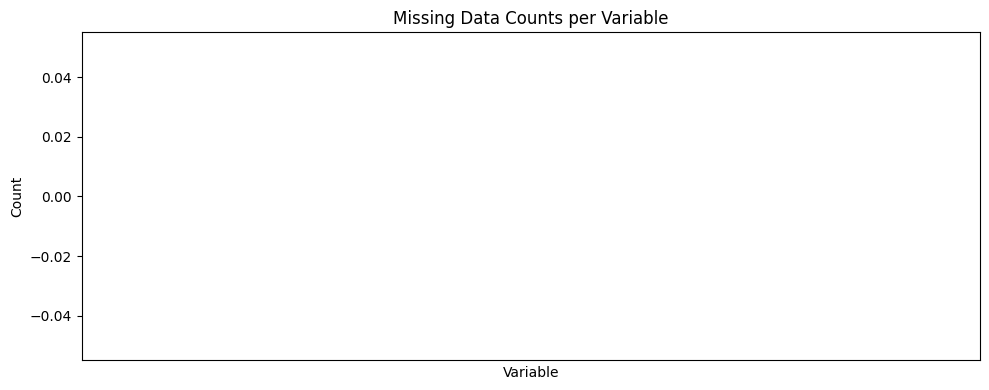

In [12]:
eda_helper_functions.plot_missing_info(train)

## 5. High-level analysis of Outliers

In [13]:
# imported IsolationForest 
# from sklearn.ensemble import IsolationForest

In [14]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [15]:
(
	train
	.assign(outlier=forest.fit_predict(train
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    .query("outlier == -1")
    .duration
    .describe()

)

count     713.000000
mean      785.820477
std       636.122708
min        75.000000
25%       150.000000
50%       610.000000
75%      1400.000000
max      2565.000000
Name: duration, dtype: float64

## 6. Pair Plots

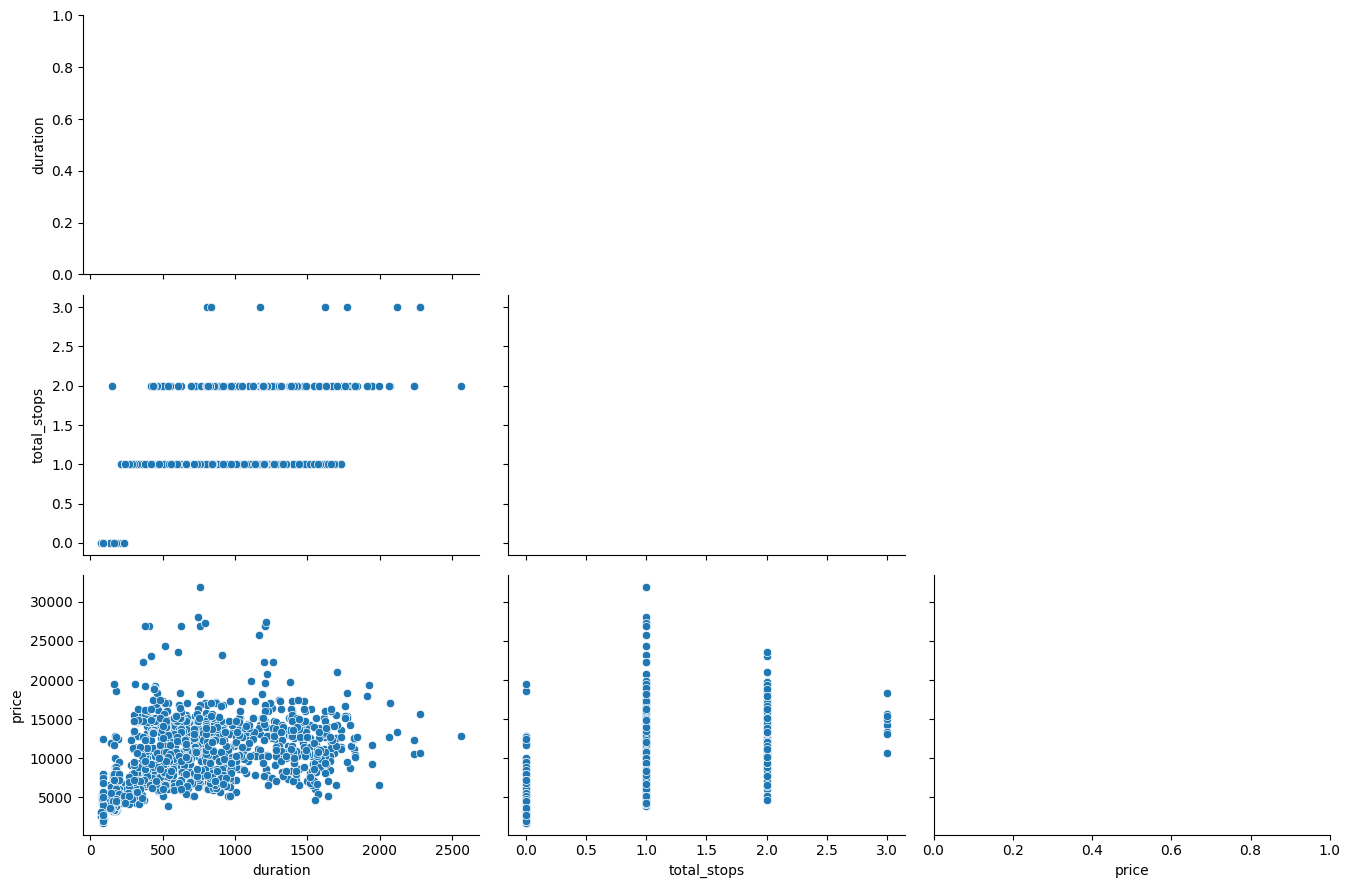

In [16]:
eda_helper_functions.pair_plots(train)

- price and duration have linear relation
- for 1 stop price is from 5000 to 35000
- for 2 stop price is from 7000 to 23000
- so we can say stops and price are related

## 7. Correlation Analysis

### Analysis of numerical variables

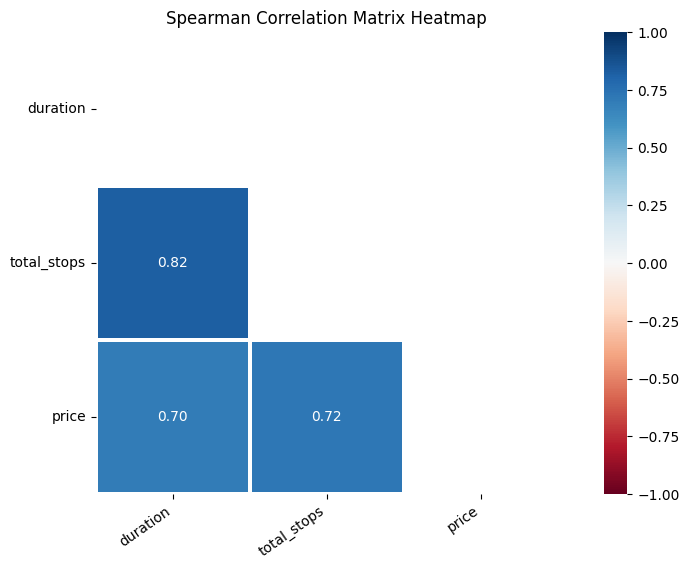

In [17]:
eda_helper_functions.correlation_heatmap(train)

In [18]:
# for understanding what is happening in "eda_helper_functions"
train.corr(method = 'spearman',numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.822070,0.698231
total_stops,0.822070,1.000000,0.721637
price,0.698231,0.721637,1.000000


### Analysis of categorical variables

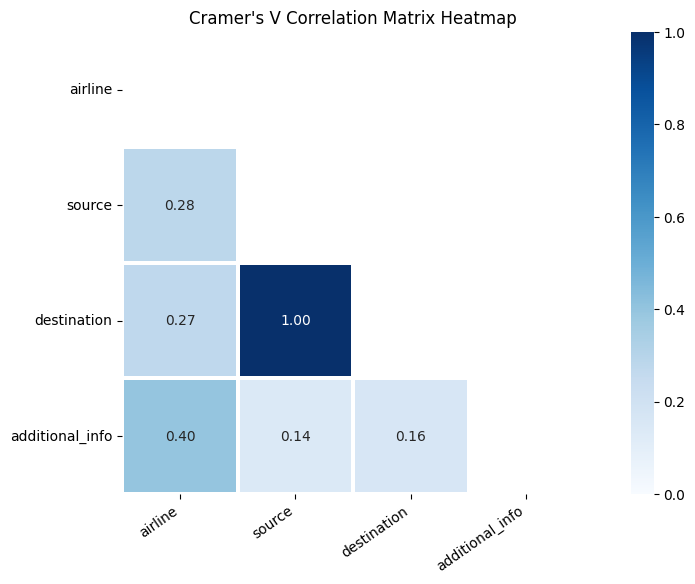

In [19]:
eda_helper_functions.cramersV_heatmap(train)